Import module and load data frame

In [197]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches

In [198]:
root = 'D:/EPL/data/data-player-21-22.csv'

df = pd.read_csv(root)
df

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type
0,Bernd,Leno,0,0,10,360,9,0.0,85.0,0.0,0,69,8.5,1,0,0,0.8,45,GK
1,Rúnar Alex,Rúnarsson,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.5,40,GK
2,Willian,Borges Da Silva,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.1,63,MID
3,Pierre-Emerick,Aubameyang,4,1,44,1036,16,132.4,217.6,582.0,7,131,92.9,6,0,3,1.2,96,FWD
4,Cédric,Soares,1,1,48,1481,27,306.5,246.0,76.0,3,292,63.0,3,0,3,0.4,42,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,Bruno André,Cavaco Jordão,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,45,MID
733,Toti António,Gomes,0,0,6,360,6,4.3,59.6,28.0,0,52,9.2,0,0,1,0.0,44,DEF
734,Dion,Sanderson,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,40,DEF
735,Ryan,Giles,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,45,MID


Clean and Preprocess data

In [199]:
df.to_csv('report.csv',index=False)

In [200]:
df.head(10)
df['goals_scored'].sum()

1037

In [201]:
df['goals_scored'] = pd.to_numeric(df['goals_scored'], downcast='integer')
df['assists'] = pd.to_numeric(df['assists'], downcast='integer')
df['goals_conceded'] = pd.to_numeric(df['goals_conceded'], downcast='integer')
df['minutes'] = pd.to_numeric(df['minutes'], downcast='integer')
df['clean_sheets'] = pd.to_numeric(df['clean_sheets'], downcast='integer')
df['red_cards'] = pd.to_numeric(df['red_cards'], downcast='integer')
df['yellow_cards'] = pd.to_numeric(df['red_cards'], downcast='integer')
df['now_cost'] = pd.to_numeric(df['now_cost'], downcast='integer')

Reporting

In [202]:
df['Min Per Match'] = df['minutes'] / 38
df['Goal Per Match'] = df['goals_scored'] / 38

df.head()

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,Min Per Match,Goal Per Match
0,Bernd,Leno,0,0,10,360,9,0.0,85.0,0.0,...,69,8.5,1,0,0,0.8,45,GK,9.473684,0.000000
1,Rúnar Alex,Rúnarsson,0,0,0,0,0,0.0,0.0,0.0,...,0,0.0,0,0,0,0.5,40,GK,0.000000,0.000000
2,Willian,Borges Da Silva,0,0,0,0,0,0.0,0.0,0.0,...,0,0.0,0,0,0,0.1,63,MID,0.000000,0.000000
3,Pierre-Emerick,Aubameyang,4,1,44,1036,16,132.4,217.6,582.0,...,131,92.9,6,0,0,1.2,96,FWD,27.263158,0.105263
4,Cédric,Soares,1,1,48,1481,27,306.5,246.0,76.0,...,292,63.0,3,0,0,0.4,42,DEF,38.973684,0.026316


#1 Statistical a play minutes of player

In [203]:
df.groupby('element_type').sum()

,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,Min Per Match,Goal Per Match
element_type,,,,,,,,,,,,,,,,,,
DEF,152.0,233.0,10568,284998.0,4470.0,28350.0,60759.8,25285.0,819,55366,11448.8,899.0,24,24,499.2,11105,7499.947368,4.000000
FWD,294.0,168.0,4269,87155.0,1457.0,13906.0,17968.4,33040.0,482,13869,6464.7,260.0,5,5,299.7,5818,2293.552632,7.736842
GK,0.0,3.0,2724,68399.0,1071.0,251.9,17269.0,0.0,203,13992,1751.3,212.0,1,1,199.6,3628,1799.973684,0.000000
MID,591.0,525.0,13853,308916.0,4783.0,64551.6,65489.4,67013.0,936,53736,19700.4,1042.0,13,13,498.7,16323,8129.368421,15.552632


In [204]:
set(df['element_type']) # Get list role of player
minutes = df.groupby('element_type').sum()['minutes']

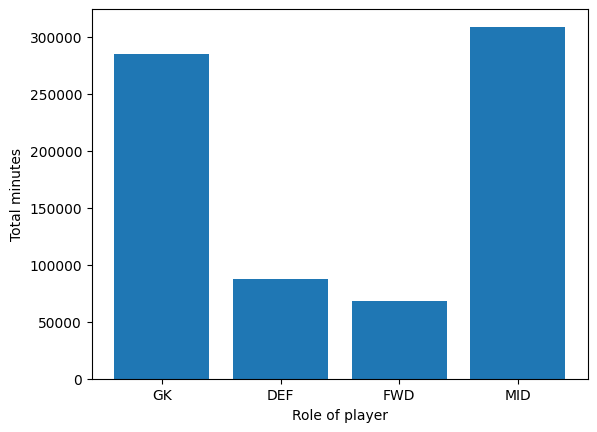

In [205]:
role = list(set(df['element_type']))
plt.bar(role, minutes)
plt.xticks(role)
plt.xlabel('Role of player')
plt.ylabel('Total minutes')
plt.show()

#2 Golden Boot 

In [206]:
df.nlargest(n=10, columns=['goals_scored'])

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,Min Per Match,Goal Per Match
382,Mohamed,Salah,23,14,265,2758,22,874.1,1203.8,2091.0,...,756,417.0,17,0,0,41.0,131,MID,72.578947,0.605263
584,Heung-Min,Son,23,10,258,3009,30,1037.8,1128.6,1211.0,...,819,338.2,18,0,0,35.6,112,MID,79.184211,0.605263
466,Cristiano Ronaldo,dos Santos Aveiro,18,3,159,2454,41,421.9,800.4,1535.0,...,608,274.6,8,0,0,18.1,122,FWD,64.578947,0.473684
582,Harry,Kane,17,11,192,3231,40,637.9,969.4,1701.0,...,684,330.4,14,0,0,23.4,125,FWD,85.026316,0.447368
379,Sadio,Mané,16,5,183,2818,24,592.5,763.2,1533.0,...,526,288.7,17,0,0,4.8,118,MID,74.157895,0.421053
307,Jamie,Vardy,15,3,133,1801,27,227.9,560.4,722.0,...,480,150.2,4,0,0,12.0,103,FWD,47.394737,0.394737
389,Diogo,Jota,15,7,175,2357,19,535.5,734.8,1327.0,...,483,258.8,14,0,0,17.3,83,MID,62.026316,0.394737
410,Kevin,De Bruyne,15,8,196,2196,22,1147.6,973.4,845.0,...,732,296.8,13,0,0,18.6,121,MID,57.789474,0.394737
237,Wilfried,Zaha,14,2,150,2759,34,630.6,732.2,963.0,...,422,232.5,11,1,1,8.5,69,MID,72.605263,0.368421
414,Raheem,Sterling,13,7,163,2121,17,588.2,709.8,1184.0,...,468,248.4,13,0,0,2.6,105,MID,55.815789,0.342105


#3 Top assist 

In [207]:
df.nlargest(n=10, columns=['assists'])

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,Min Per Match,Goal Per Match
681,Jarrod,Bowen,12,17,206,2987,46,624.6,819.4,1201.0,...,586,264.7,8,0,0,15.0,69,MID,78.605263,0.315789
382,Mohamed,Salah,23,14,265,2758,22,874.1,1203.8,2091.0,...,756,417.0,17,0,0,41.0,131,MID,72.578947,0.605263
317,Harvey,Barnes,6,12,137,2095,30,413.0,525.2,975.0,...,377,191.0,8,0,0,4.2,65,MID,55.131579,0.157895
386,Trent,Alexander-Arnold,2,12,208,2853,22,1362.8,837.2,478.0,...,864,268.1,18,0,0,37.9,84,DEF,75.078947,0.052632
213,Mason,Mount,11,11,169,2358,25,914.8,812.8,931.0,...,597,265.8,11,0,0,21.9,77,MID,62.052632,0.289474
314,James,Maddison,12,11,181,2454,41,664.1,767.4,753.0,...,637,218.3,5,0,0,16.3,69,MID,64.578947,0.315789
383,Andrew,Robertson,3,11,186,2537,20,882.7,660.2,329.0,...,770,187.4,17,1,1,11.6,73,DEF,66.763158,0.078947
415,João Pedro Cavaco,Cancelo,1,11,201,3227,25,750.1,778.6,797.0,...,829,232.8,19,0,0,41.4,72,DEF,84.921053,0.026316
582,Harry,Kane,17,11,192,3231,40,637.9,969.4,1701.0,...,684,330.4,14,0,0,23.4,125,FWD,85.026316,0.447368
584,Heung-Min,Son,23,10,258,3009,30,1037.8,1128.6,1211.0,...,819,338.2,18,0,0,35.6,112,MID,79.184211,0.605263


#4 Clean sheets

In [208]:
df.loc[df['element_type'] == 'GK'].sort_values(by='clean_sheets', ascending=False)

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,...,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type,Min Per Match,Goal Per Match
416,Ederson,Santana de Moraes,0,0,155,3330,26,0.0,556.0,0.0,...,701,55.6,20,0,0,12.1,62,GK,87.631579,0.0
380,Alisson,Ramses Becker,0,1,176,3240,24,10.0,688.0,0.0,...,782,69.8,20,0,0,9.4,61,GK,85.263158,0.0
579,Hugo,Lloris,0,0,158,3420,40,23.0,743.6,0.0,...,703,76.6,16,0,0,8.5,55,GK,90.000000,0.0
218,Edouard,Mendy,0,0,130,3060,31,0.0,564.8,0.0,...,573,56.1,14,0,0,11.4,61,GK,80.526316,0.0
32,Aaron,Ramsdale,0,0,135,3060,39,1.0,680.0,0.0,...,641,68.0,12,0,0,17.1,51,GK,80.526316,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Cieran,Slicker,0,0,0,0,0,0.0,0.0,0.0,...,0,0.0,0,0,0,0.0,40,GK,0.000000,0.0
117,Matthew,Cox,0,0,0,0,0,0.0,0.0,0.0,...,0,0.0,0,0,0,0.1,40,GK,0.000000,0.0
451,Dean,Henderson,0,0,0,0,0,0.0,0.0,0.0,...,0,0.0,0,0,0,0.4,47,GK,0.000000,0.0
461,Tom,Heaton,0,0,0,0,0,0.0,0.0,0.0,...,0,0.0,0,0,0,0.8,39,GK,0.000000,0.0
